# 2024 Imperial - AI/ML professional certificate - Captstone - Project - Modelling

## Data preperation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import time
RANDOM_STATE = 42
FEATURE_COLS = [ 'u', 'g', 'r', 'i', 'z', 'redshift']
OUTPUT_COL = ['class']

output_label = ['GALAXY', 'QSO', 'STAR']
output_value=[1,2,3]

np.random.seed(seed=RANDOM_STATE)

In [24]:
X = pd.read_csv('./data/star_classification_cleaned_norm_features.csv', usecols=FEATURE_COLS)
y = pd.read_csv('./data/star_classification_cleaned_norm_output.csv', usecols=OUTPUT_COL)

print(X.shape)
print(y.shape)

(99999, 6)
(99999, 1)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE, shuffle=True)

In [26]:
def plot_metric(y_true, y_predict):
    ConfusionMatrixDisplay(confusion_matrix(y_true=y_true, y_pred=y_predict, normalize='true'), display_labels=output_label).plot()
    model_random_train_accuracy = accuracy_score(y_true=y_true, y_pred=y_predict)
    return model_random_train_accuracy*100
    

## Base Model - Random Prediction

In [27]:
model_random_train_predict = np.random.randint(1, 4, size=y_train.shape[0])
model_random_test_predict = np.random.randint(1, 4, size=y_test.shape[0])

Random Model Training Set Accuracy: 33.37%


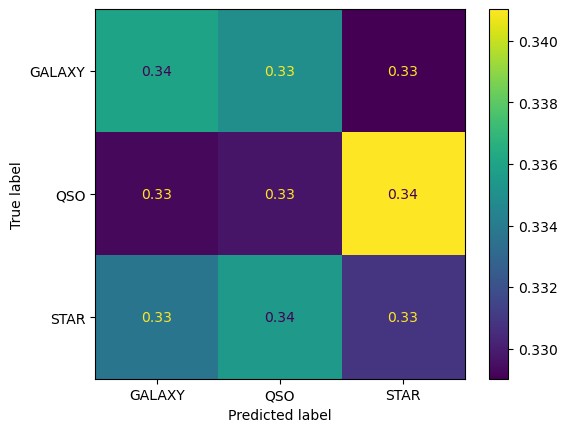

In [28]:
# metrics for training set
model_random_train_accuracy = plot_metric(y_train, model_random_train_predict)
print("Random Model Training Set Accuracy: {:.2f}%".format(model_random_train_accuracy))

Random Model Tests Set Accuracy: 33.77%


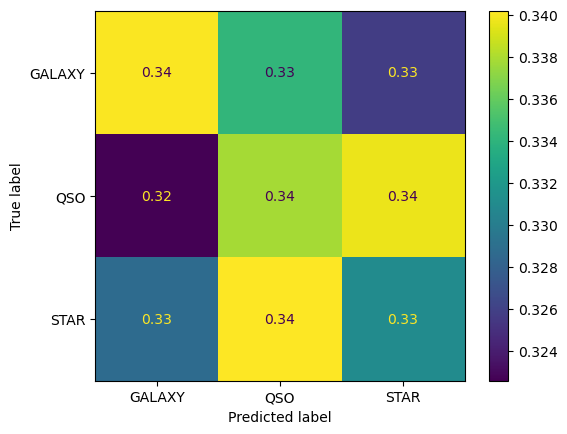

In [29]:
# metrics for test set
model_random_train_accuracy = plot_metric(y_test, model_random_test_predict)
print("Random Model Tests Set Accuracy: {:.2f}%".format(model_random_train_accuracy))

## Decision Tree

In [30]:
from models.tree.simple_tree import train_simple_tree
start = time.time()
model_tree = train_simple_tree(X_train, y_train, X_test, y_test)
end = time.time()
model_tree_training_time = end - start
print("Tree Model Trainig time in seconds: {:}".format(model_tree_training_time))

Depth: 1 Train Score: 0.8054350679383492 Validation Score: 0.80455
Depth: 2 Train Score: 0.9475118438980488 Validation Score: 0.9465
Depth: 3 Train Score: 0.9516118951486894 Validation Score: 0.95055
Depth: 4 Train Score: 0.96582457280716 Validation Score: 0.9648
Depth: 5 Train Score: 0.9658995737446718 Validation Score: 0.9646
Depth: 6 Train Score: 0.9701121264015801 Validation Score: 0.9666
Depth: 7 Train Score: 0.9764747059338241 Validation Score: 0.9729
Depth: 8 Train Score: 0.9777872223402793 Validation Score: 0.9741
Depth: 9 Train Score: 0.9804872560907011 Validation Score: 0.9751
Depth: 10 Train Score: 0.9822247778097226 Validation Score: 0.97265
Depth: 11 Train Score: 0.9851498143726797 Validation Score: 0.97225
Depth: 12 Train Score: 0.9875248440605507 Validation Score: 0.9719
Depth: 13 Train Score: 0.989874873435918 Validation Score: 0.9713
Depth: 14 Train Score: 0.9921999024987812 Validation Score: 0.97035
Depth: 15 Train Score: 0.9940374254678184 Validation Score: 0.96905
D

In [31]:
# final model
model_tree_train_predict = model_tree.predict(X_train)
model_tree_test_predict = model_tree.predict(X_test)

Tree Model Training Set Accuracy: 98.05%


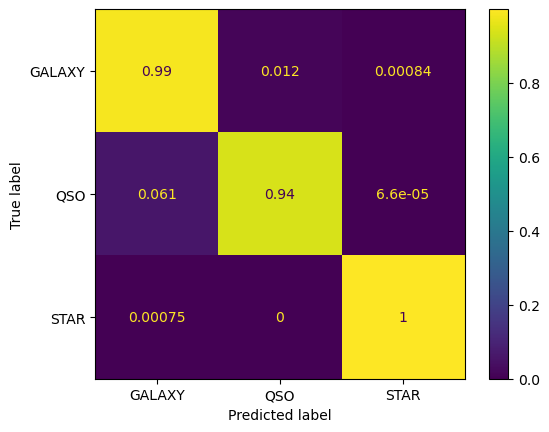

In [32]:
model_tree_train_accuracy = plot_metric(y_train, model_tree_train_predict)
print("Tree Model Training Set Accuracy: {:.2f}%".format(model_tree_train_accuracy))

Tree Model Test Set Accuracy: 97.50%


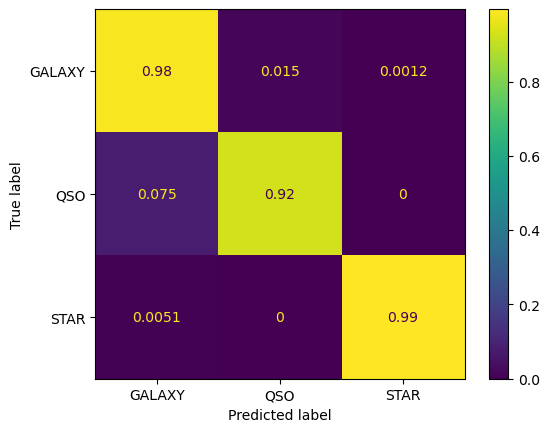

In [33]:
model_tree_test_accuracy = plot_metric(y_test, model_tree_test_predict)
print("Tree Model Test Set Accuracy: {:.2f}%".format(model_tree_test_accuracy))

## Tree Ensemble

### Random Forest

In [34]:
# work through number of depths to find best tree
from models.tree.random_forest import train_random_forest
start = time.time()
model_forest = train_random_forest(X_train, y_train, X_test, y_test)
end = time.time()
model_forest_training_time = end - start
print("Random Forest Model Trainig time in seconds: {:}".format(model_forest_training_time))

N estimators 50 Max Depth: 7 Train Score: 0.9774122176527207 Validation Score: 0.9746
N estimators 50 Max Depth: 8 Train Score: 0.9787497343716797 Validation Score: 0.975
N estimators 50 Max Depth: 9 Train Score: 0.9813622670283378 Validation Score: 0.976
N estimators 50 Max Depth: 10 Train Score: 0.9835622945286816 Validation Score: 0.9768
N estimators 50 Max Depth: 11 Train Score: 0.985862323279041 Validation Score: 0.977
N estimators 50 Max Depth: 12 Train Score: 0.987999849998125 Validation Score: 0.97715
N estimators 75 Max Depth: 7 Train Score: 0.9774122176527207 Validation Score: 0.97445
N estimators 75 Max Depth: 8 Train Score: 0.9786872335904199 Validation Score: 0.97515
N estimators 75 Max Depth: 9 Train Score: 0.9813997674970937 Validation Score: 0.9761
N estimators 75 Max Depth: 10 Train Score: 0.9836872960912011 Validation Score: 0.9768
N estimators 100 Max Depth: 7 Train Score: 0.9775372192152402 Validation Score: 0.9744
N estimators 75 Max Depth: 11 Train Score: 0.985849

In [35]:
model_forest_train_predict = model_forest.predict(X_train.values)
model_forest_test_predict = model_forest.predict(X_test.values)

Tree Forest Training Set Accuracy: 98.80%


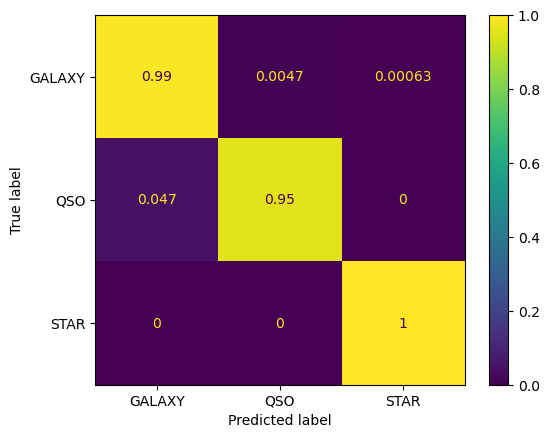

In [36]:
model_forest_train_accuracy = plot_metric(y_train, model_forest_train_predict)
print("Tree Forest Training Set Accuracy: {:.2f}%".format(model_forest_train_accuracy))

Tree Forest Test Set Accuracy: 97.74%


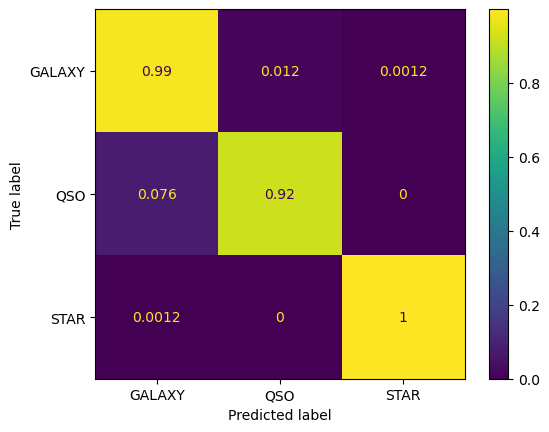

In [37]:
model_forest_test_accuracy = plot_metric(y_test, model_forest_test_predict)
print("Tree Forest Test Set Accuracy: {:.2f}%".format(model_forest_test_accuracy))

### Ada Boost

In [38]:
from models.tree.ada_boost import train_ada_forest
start = time.time()
model_ada = train_ada_forest(X_train, y_train, X_test, y_test)
end = time.time()
model_ada_training_time = end - start
print("Ada Forest Model Trainig time in seconds: {:}".format(model_ada_training_time))



N estimators 50.0 Learning Rate: 0.5 Train Score: 0.9944749309366367 Validation Score: 0.97505
N estimators 50.0 Learning Rate: 10.0 Train Score: 0.9782997287466093 Validation Score: 0.97065
N estimators 50.0 Learning Rate: 5.0 Train Score: 0.9725621570269628 Validation Score: 0.96455
N estimators 50.0 Learning Rate: 0.75 Train Score: 0.9999624995312442 Validation Score: 0.9751
N estimators 50.0 Learning Rate: 1.0 Train Score: 1.0 Validation Score: 0.97475
N estimators 50.0 Learning Rate: 1.25 Train Score: 1.0 Validation Score: 0.9739
N estimators 50.0 Learning Rate: 2.0 Train Score: 0.9920374004675059 Validation Score: 0.97315
N estimators 50.0 Learning Rate: 1.5 Train Score: 1.0 Validation Score: 0.9739
N estimators 75.0 Learning Rate: 10.0 Train Score: 0.978099726246578 Validation Score: 0.97035
N estimators 75.0 Learning Rate: 0.5 Train Score: 0.9991374892186152 Validation Score: 0.9754
N estimators 75.0 Learning Rate: 5.0 Train Score: 0.9691246140576757 Validation Score: 0.9624
N 

In [39]:
model_ada_train_predict = model_ada.predict(X_train.values)
model_ada_test_predict = model_ada.predict(X_test.values)

Ada Boost Training Set Accuracy: 100.00%


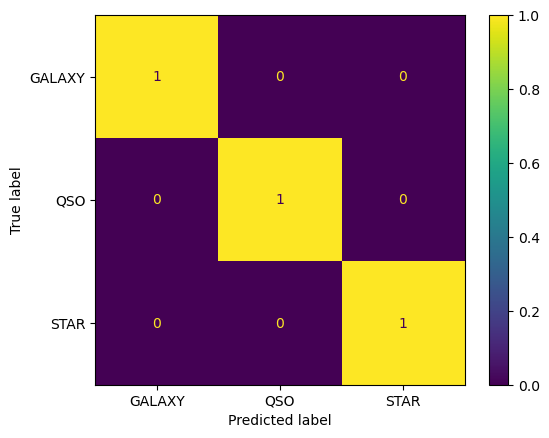

In [40]:
model_ada_train_accuracy = plot_metric(y_train, model_ada_train_predict)
print("Ada Boost Training Set Accuracy: {:.2f}%".format(model_ada_train_accuracy))

Ada Boost Test Set Accuracy: 97.72%


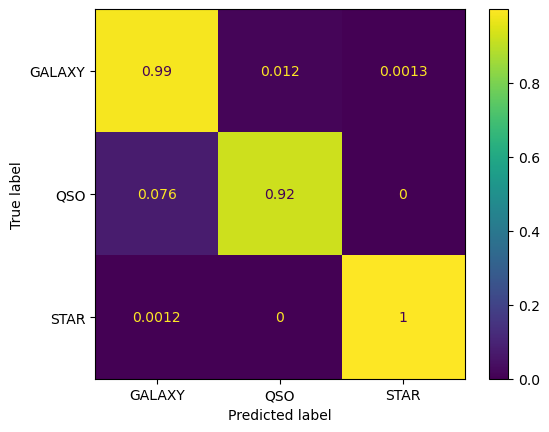

In [41]:
model_ada_test_accuracy = plot_metric(y_test, model_ada_test_predict)
print("Ada Boost Test Set Accuracy: {:.2f}%".format(model_ada_test_accuracy))

## Support Vector Machine

We use the One vs One multi classification approach

In [42]:
from models.svm.simple_svm import train_svm
start = time.time()
model_svm = train_svm(X_train, y_train, X_test, y_test)
end = time.time()
model_svm_training_time = end - start
print("Model SVM trainign time in seconds {:}".format(model_svm_training_time))


Kernel:  linear Train Score: 0.9606870085876074 Validation Score: 0.9582
Kernel:  rbf Train Score: 0.9652245653070664 Validation Score: 0.96255
Kernel:  poly Train Score: 0.9514993937424218 Validation Score: 0.9504
Best parameters for SVM : rbf
Model SVM trainign time in seconds 63.10011625289917


In [43]:
model_svm_train_predict = model_svm.predict(X_train.values)
model_svm_test_predict = model_svm.predict(X_test.values)

SVM Training Set Accuracy: 96.52%


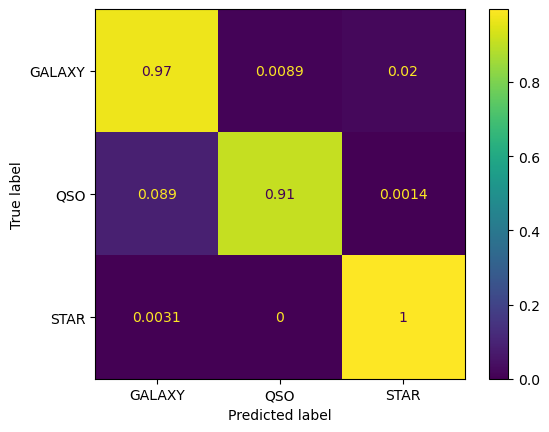

In [44]:
model_svm_train_accuracy = plot_metric(y_train, model_svm_train_predict)
print("SVM Training Set Accuracy: {:.2f}%".format(model_svm_train_accuracy))

SVM Training Set Accuracy: 96.25%


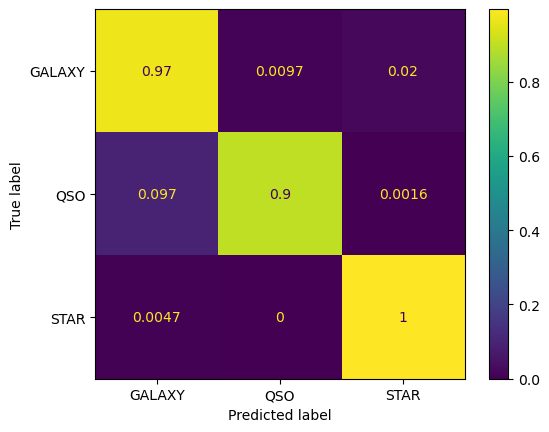

In [45]:
model_svm_test_accuracy = plot_metric(y_test, model_svm_test_predict)
print("SVM Training Set Accuracy: {:.2f}%".format(model_svm_test_accuracy))

## KNN

In [46]:
from models.knn.simple_knn import train_knn

start = time.time()
model_knn = train_knn(X_train, y_train, X_test, y_test)
end = time.time()
model_knn_training_time = end-start
print('Training time for KNN {:}'.format(model_knn_training_time))

Neighbours:  5 Train Score: 0.9697871223390292 Validation Score: 0.96155
Neighbours:  10 Train Score: 0.9657620720259004 Validation Score: 0.9593
Neighbours:  15 Train Score: 0.9625870323379042 Validation Score: 0.9577
Neighbours:  20 Train Score: 0.9608620107751347 Validation Score: 0.95715
Neighbours:  25 Train Score: 0.9595244940561757 Validation Score: 0.9558
Neighbours:  30 Train Score: 0.9585869823372792 Validation Score: 0.9552
Neighbours:  40 Train Score: 0.9564494556181953 Validation Score: 0.95355
Neighbours:  50 Train Score: 0.9545119313991425 Validation Score: 0.95225
Neighbours:  100 Train Score: 0.9472368404605057 Validation Score: 0.94605
Best parameters for KNN : 5
Training time for KNN 8.080747127532959


In [47]:
model_knn_train_predict = model_knn.predict(X_train.values)
model_knn_test_predict = model_knn.predict(X_test.values)

KNN Training Set Accuracy: 96.98%


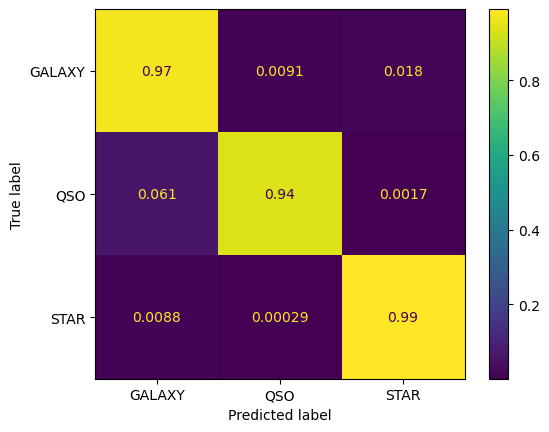

In [48]:
model_knn_train_accuracy = plot_metric(y_train, model_knn_train_predict)
print("KNN Training Set Accuracy: {:.2f}%".format(model_knn_train_accuracy))

KNN Test Set Accuracy: 96.16%


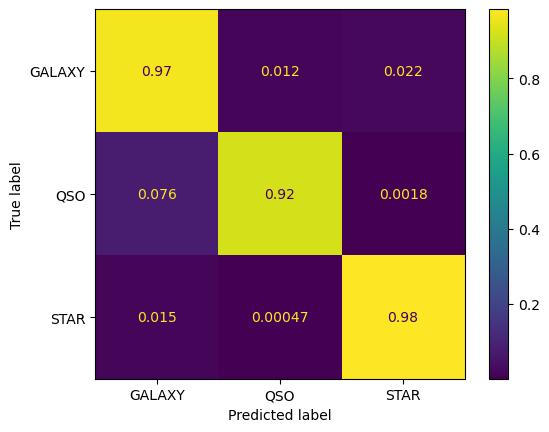

In [49]:
model_knn_test_accuracy = plot_metric(y_test, model_knn_test_predict)
print("KNN Test Set Accuracy: {:.2f}%".format(model_knn_test_accuracy))

## Summary

### Model accuracy

In [50]:
print("Tree Accuracy: {:}".format(model_tree_test_accuracy))
print("Random forest accuracy {:}".format(model_forest_test_accuracy))
print("ADA Boost accuracy {:}".format(model_ada_test_accuracy))
print("SVM accuracy {:}".format(model_svm_test_accuracy))
print("KNN accuracy {:}".format(model_knn_test_accuracy))


Tree Accuracy: 97.495
Random forest accuracy 97.74000000000001
ADA Boost accuracy 97.72
SVM accuracy 96.255
KNN accuracy 96.155


### Training times

In [51]:
print("Tree training time {:}".format(model_tree_training_time))
print("Random training time {:}".format(model_forest_training_time))
print("ADA Boost training time {:}".format(model_ada_training_time))
print("SVM training time {:}".format(model_svm_training_time))
print("KNN training time {:}".format(model_knn_training_time))


Tree training time 9.612837076187134
Random training time 152.12545609474182
ADA Boost training time 339.25922203063965
SVM training time 63.10011625289917
KNN training time 8.080747127532959


### Analysis

It is clear the tree performs the best, with random forest and Ada performing slightly better.
Given the expensive trainig time for the ensemble methods, ada boost taking the most.
We will take the three best models to the K-fold validation.

## K fold validation

We now perform K-fold corss validation to ensure we get the best model. We choose K = 10 and score as 'balanced_accuracy'

In [52]:
from sklearn.model_selection import cross_val_score
K = 10

model_tree_cross_val_score = cross_val_score(model_tree, X.values, y['class'].values, cv=K, scoring='balanced_accuracy',n_jobs=10)
model_forest_cross_val_score = cross_val_score(model_forest, X.values, y['class'].values, cv=K, scoring='balanced_accuracy', n_jobs=10)
model_ada_cross_val_score = cross_val_score(model_ada, X.values, y['class'].values, cv=K, scoring='balanced_accuracy', n_jobs=10)


In [53]:
print("Model Tree: %0.4f accuracy with a standard deviation of %0.4f" % (model_tree_cross_val_score.mean(), model_tree_cross_val_score.std()))
print("Model Forest: %0.4f accuracy with a standard deviation of %0.4f" % (model_forest_cross_val_score.mean(), model_forest_cross_val_score.std()))
print("Model Ada Boost: %0.4f accuracy with a standard deviation of %0.4f" % (model_ada_cross_val_score.mean(), model_ada_cross_val_score.std()))



Model Tree: 0.9686 accuracy with a standard deviation of 0.0012
Model Forest: 0.9720 accuracy with a standard deviation of 0.0018
Model Ada Boost: 0.9705 accuracy with a standard deviation of 0.0017


# Model choice

## Result analysis & Model Choice

We can see that all models fit very well. Therefore one might be concered here with overfitting. However I think the excellent results are due to the very clean data. The data from the sky survey has undergone cleaning and so we are not fitting to as much noise. Notice also that we do not have a many features.

The simple decision tree is a an excellent model here performs well in accuracy and generalises well. This is the recomended model here.

Random forest also performs excelletly and beats the simple decision tree, but as we have very few features, the simple tree is a better choice

The simple tree is also more interpetable than the other models.



## Visualizing features

[Text(0.35463504196642687, 0.95, 'redshift <= -0.78\n1.38\n100.0%\n[0.59, 0.19, 0.22]\nGALAXY'),
 Text(0.06722122302158273, 0.85, 'redshift <= -0.79\n0.16\n22.2%\n[0.02, 0.0, 0.98]\nSTAR'),
 Text(0.024580335731414868, 0.75, 'redshift <= -0.8\n0.03\n13.7%\n[0.0, 0.0, 1.0]\nSTAR'),
 Text(0.022182254196642687, 0.65, '0.0\n0.0%\n[1.0, 0.0, 0.0]\nGALAXY'),
 Text(0.02697841726618705, 0.65, 'u <= -0.12\n0.03\n13.7%\n[0.0, 0.0, 1.0]\nSTAR'),
 Text(0.01079136690647482, 0.55, 'r <= -0.97\n0.01\n8.5%\n[0.0, 0.0, 1.0]\nSTAR'),
 Text(0.008393285371702638, 0.45, '0.0\n4.4%\n[0.0, 0.0, 1.0]\nSTAR'),
 Text(0.013189448441247002, 0.45, 'z <= -0.7\n0.02\n4.1%\n[0.0, 0.0, 1.0]\nSTAR'),
 Text(0.007194244604316547, 0.35, 'z <= -0.7\n0.2\n0.1%\n[0.03, 0.0, 0.97]\nSTAR'),
 Text(0.004796163069544364, 0.25, 'r <= -0.97\n0.14\n0.1%\n[0.02, 0.0, 0.98]\nSTAR'),
 Text(0.002398081534772182, 0.15, '0.0\n0.0%\n[1.0, 0.0, 0.0]\nGALAXY'),
 Text(0.007194244604316547, 0.15, 'r <= -0.76\n0.08\n0.1%\n[0.01, 0.0, 0.99]\nSTAR

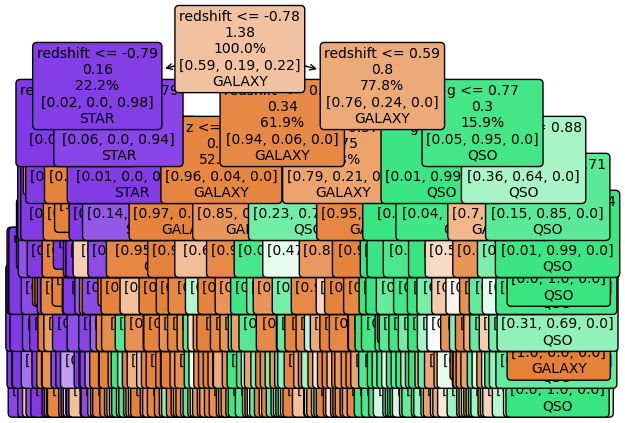

In [54]:
from sklearn import tree
tree.plot_tree(model_tree, feature_names=FEATURE_COLS, class_names=output_label, label='none', filled=True, rounded = True, proportion = True, precision = 2, fontsize=10)

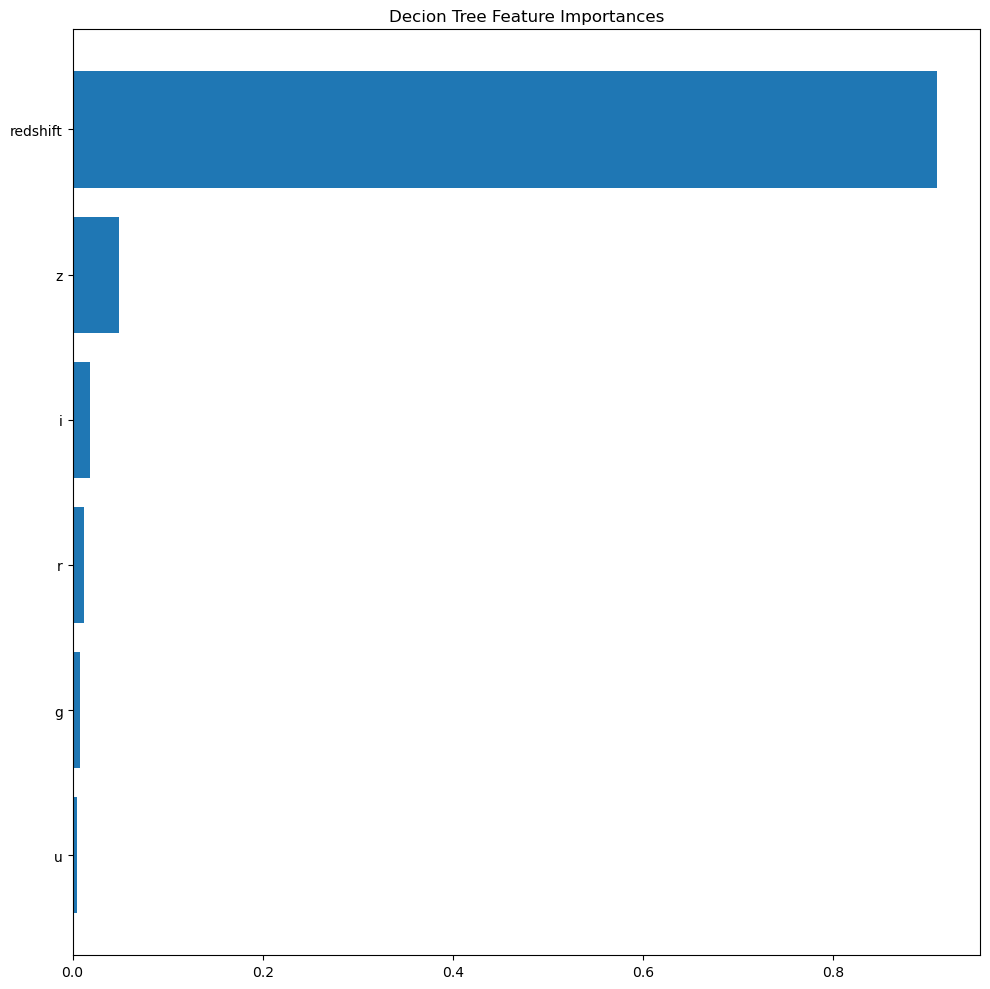

In [55]:

feature_imp = model_tree.feature_importances_
sorted_idx = feature_imp.argsort()
y_ticks = np.arange(0, len(FEATURE_COLS))
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(y_ticks, feature_imp[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(FEATURE_COLS)
ax.set_title("Decion Tree Feature Importances")
fig.tight_layout()
plt.show()

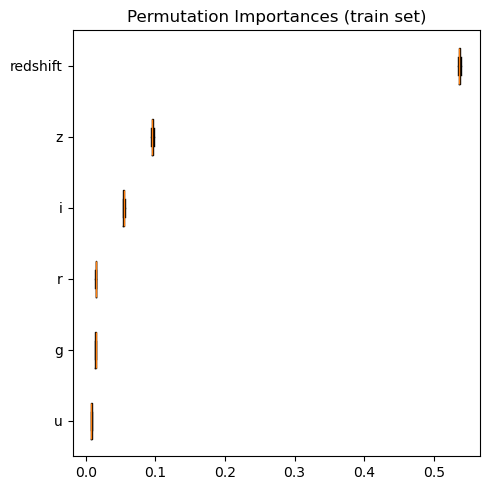

In [56]:
from sklearn.inspection import permutation_importance

result = permutation_importance(estimator=model_tree , X=X_train , y=y_train , n_repeats=50, random_state=42, n_jobs=10)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(5, 5))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=FEATURE_COLS
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

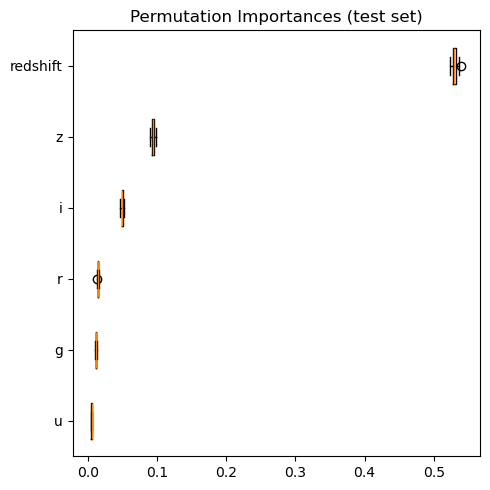

In [57]:
from sklearn.inspection import permutation_importance

result = permutation_importance(estimator=model_tree , X=X_test , y=y_test , n_repeats=50, random_state=42, n_jobs=10)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(5, 5))
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=FEATURE_COLS
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

Text(0, 0.5, 'redshift')

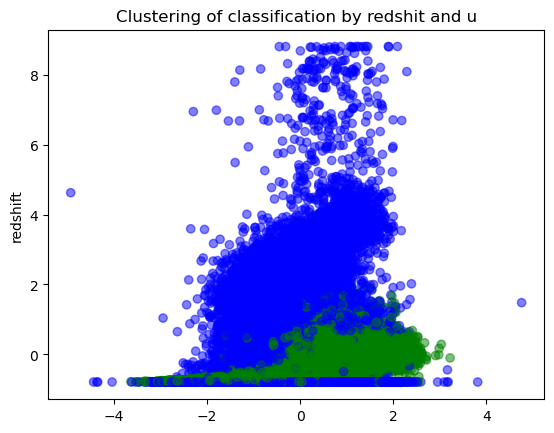

In [58]:
colors = []
for _l in y['class']:
    if _l == 0:
        colors.append('red')
    elif _l == 1:
        colors.append('green')
    else:
        colors.append('blue')

plt.scatter(X['u'],X['redshift'], c = colors, alpha=0.5)
plt.title('Clustering of classification by redshit and u')
plt.ylabel('u')
plt.ylabel('redshift')

Text(0, 0.5, 'redshift')

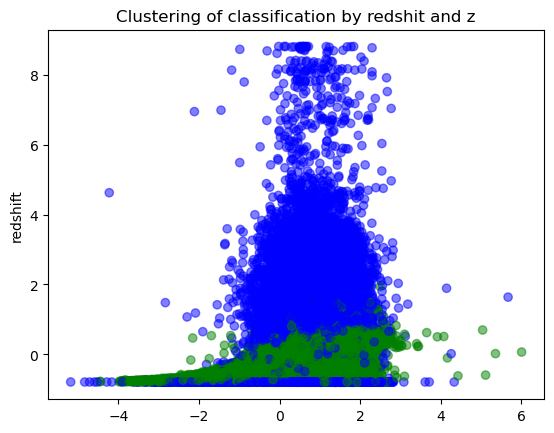

In [59]:
colors = []
for _l in y['class']:
    if _l == 0:
        colors.append('red')
    elif _l == 1:
        colors.append('green')
    else:
        colors.append('blue')

plt.scatter(X['z'],X['redshift'], c = colors, alpha=0.5)
plt.title('Clustering of classification by redshit and z')
plt.ylabel('u')
plt.ylabel('redshift')